In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import pandas as pd
from nltk.corpus import stopwords
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/word2vec-nlp-tutorial/"))
print(os.listdir("../input/movie-review/"))

# Any results you write to the current directory are saved as output.

['testData.tsv', 'sampleSubmission.csv', 'labeledTrainData.tsv', 'unlabeledTrainData.tsv']
['imdb_master.csv']


* First we import important packages like pandas,nltk,re,os 
* we use pandas to handle our dataset it is used to take input of test and training data then 
* we import stopwords to remove usnecessary words like is,are,names etc from the dataset we use re to keep only words
* i will explain this in details where we use re. then we import os for setting directory
* some worldcloud and barplot visualization 

***if you dont have any of these files then you can download these files from command prompt  pip install module name
for pandas --- pip install pandas for nltk ---- pip install nltk then you have to download stopwords by going to python editor and import nltk then nltk.download() select all from gui or you can make custom download i suggest you to download all. Rest are inbuilt in python(excluding keras i explained thoses below) just import and enjoy.***

## First use pandas pd.read_csv() for reading these tabulated files and our basic process will be like 
* importing data 
* cleaning them 
* visualizing them 
* our stack models for deep leaning with 

In [26]:
df_train = pd.read_csv("../input/word2vec-nlp-tutorial/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
df_train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [27]:
df_train1=pd.read_csv("../input/movie-review/imdb_master.csv",encoding="latin-1")
df_train1.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


## dropping unecessary columns from additional dataset and combine as one ,
**step 1 done
now after this cleaning will startdown**

In [28]:
df_train1=df_train1.drop(["type",'file'],axis=1)

In [29]:
df_train1.rename(columns={'label':'sentiment',
                          'Unnamed: 0':'id',
                          'review':'review'}, 
                 inplace=True)

In [30]:
df_train1 = df_train1[df_train1.sentiment != 'unsup']

In [31]:
maping = {'pos': 1, 'neg': 0}
df_train1['sentiment'] = df_train1['sentiment'].map(maping)

In [32]:
new_train=pd.concat([df_train,df_train1])

In [33]:
df_test=pd.read_csv("../input/word2vec-nlp-tutorial/testData.tsv",header=0, delimiter="\t", quoting=3)
df_test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [34]:
new_train.head()

,id,review,sentiment
0,"""5814_8""","""With all this stuff going down at the moment ...",1
1,"""2381_9""","""\""The Classic War of the Worlds\"" by Timothy ...",1
2,"""7759_3""","""The film starts with a manager (Nicholas Bell...",0
3,"""3630_4""","""It must be assumed that those who praised thi...",0
4,"""9495_8""","""Superbly trashy and wondrously unpretentious ...",1


# So for now files importing has been done 
# Step 2 begins that is data cleaning

# making function for filtering the text

*  removing html tags 
*  re.sub("[^a-zA-Z]"," ", raw_review)" 
* in this line we will keep all the alphabetical words which are present in the file name raw_review all special characters are replaced by a space.
* spliting of words with normalizing it 
* taking stopwords into account 
* checking words alphanumeric or not 
* then after checking we stopwords finding and removing them 
* joinning meaningful words

In [35]:
from bs4 import BeautifulSoup
def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'lxml').get_text() 
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

new_train['review']=new_train['review'].apply(review_to_words)
df_test["review"]=df_test["review"].apply(review_to_words)

# using above function and store the filter things in array

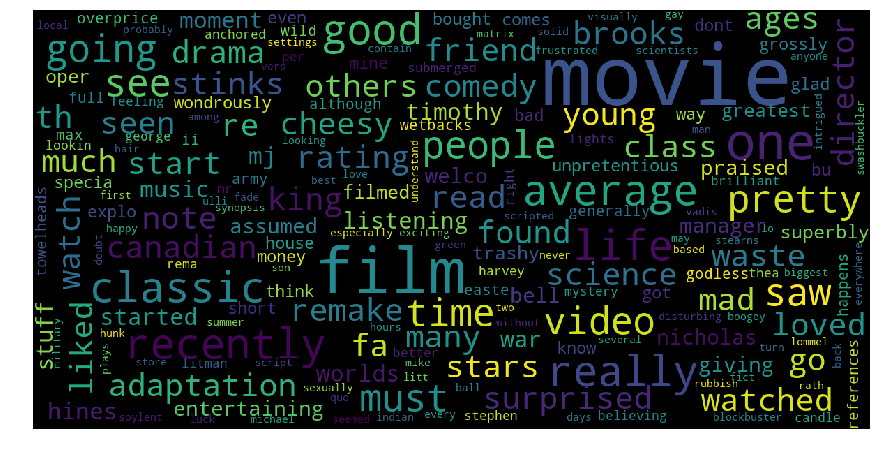

In [36]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(new_train["review"])

In [37]:
# checking nullity in the data of train and test
new_train.isnull().sum(),df_test.isnull().sum()


(id           0
 review       0
 sentiment    0
 dtype: int64, id        0
 review    0
 dtype: int64)

# importing keras files 
## tokenizer and padding is necessary so that long and short reviews must be of same length
## what is stacking idea , first to create word2vec dictionary , word embbeding 
## apply cnn with maxpooling to find out features of neg and positive sentiment 
## apply lstm bi directional unit to for need of good memory 

Background of the Techniques
Convolution Neural Networks (CNN):

CNN’s are efficient for sentence classification tasks as the convolution layers can extract features horizontally from multiple words . These characteristics are essential for classification tasks as it is tricky to find clues about class memberships especially when these clues can appear in different orders in the input.  CNN has also been used for document topic classifications where a single local phrase could aid in establishing the topic regardless of the position where it appears in the document. They found that CNN is powerful enough to find these local indicators due to the powerful combination of the convolution and pooling layers.
Long Short-Term Memory (LSTM):

An example of LSTM’s effectiveness is its ability to capture changing sentiment in a tweet. A sentence such as “The movie was fine but not to my expectation” contains words with conflicting sentiments which is not able to be inferred accurately by a typical neural network. However, LSTM will learn that the sentiments expressed towards the end of the sentence would carry more important context compared to the words at the start.

CNN — LSTM Model:

The final model architecture is . We initialized the model with Keras’ Sequential layer and added the embedding layer as the first layer. By using the embedding layer, the positive integers is turned into a dense vector of fixed size and this new representations will be passed to the CNN layer. Each filter in the CNN will detect specific features or patterns and then it will be pooled to a smaller dimension in the max-pooling layer. These features are then passed into a single LSTM layer of 100 units. Then, the LSTM outputs are then fed to a Fully Connected Layer (FCL) which was built using Keras’s Dense layer. As there are five labels to be predicted, a softmax activation function was used at the output layer.




In [38]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [39]:
list_classes = ["sentiment"]
y = new_train[list_classes].values
list_sentences_train = new_train["review"]
list_sentences_test = df_test["review"]

# tokenize upto max 6000 words 
# then using keras function of preprocessing of tokenizing and padding 


In [40]:
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

# checking distribution of word length

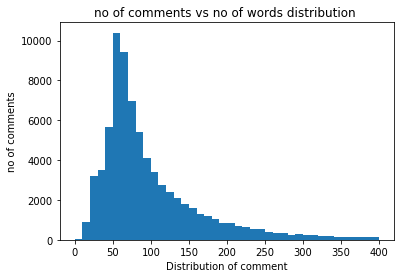

In [41]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.xlabel("Distribution of comment")
plt.ylabel("no of comments")
plt.title("no of comments vs no of words distribution ")
plt.show()

# maxlen of review is 400 words 

In [42]:
maxlen = 370
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [43]:
inp = Input(shape=(maxlen, ))
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [44]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [46]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 60000 samples, validate on 15000 samples
Epoch 1/2
60000/60000 [==============================] - 1499s 25ms/step - loss: 0.2630 - acc: 0.8940 - val_loss: 0.2099 - val_acc: 0.9264
Epoch 2/2
60000/60000 [==============================] - 1569s 26ms/step - loss: 0.1920 - acc: 0.9264 - val_loss: 0.1446 - val_acc: 0.9511


In [47]:
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)

In [48]:
df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["sentiment"]

In [49]:
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

F1-score: 0.9580298579534025
Confusion matrix:


array([[12053,   596],
       [  447, 11904]])

In [50]:
# ouput submission file 
df_test = df_test[['id','sentiment']]

In [ ]:
df_test.to_csv("submission.csv",index=False)